In [161]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Data/mnist_train.csv')
test_data = pd.read_csv('Data/mnist_test.csv')

In [162]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MNIST  
tập dữ liệu chứa số viết tay từ 0-9 với 28x28 pixel (784)

dự đoán cái img đó là số mấy


# My Neural Networks
- input layer = 784 nodes
- hidden layer 1 = 10 nodes (số từ 0-9). Học các đặc trưng phức tạp từ dữ liệu đầu vào. (các số viết tay sẽ có đặc trưng như nào)
- output layer (aka hidden layer 2) = 10 nodes. lớp phân loại, Chuyển đổi các đặc trưng đã học từ lớp 1 thành xác suất đặc trưng đó sẽ có xác suất là số mấy

-> 2-layer neural networks

### Math
- Z1: lớp 1
- Z2: lớp 2 
- A: output (A[0] là input; A[1] là output của lớp 1)
- W1: các weight của lớp 1
- W2: các weight của lớp 2
- b1: bias của lớp 1
- b2: bias của lớp 2
- m: số dòng dữ liệu
- n: số cột (1: lable + 784 pixel) 
- alpha: learning rate
- g(): activation function

In [163]:
print(test_data.shape)
print(data.shape)


(10000, 785)
(60000, 785)


## data preprocessing

- chuyển đổi sang array, thường thế :v các bài toán làm việc với thống kê toán học thì chuyển đổi sang array cho dễ
- Y là label (cột 1, index 0)
- X là các pixel (các cột còn lại, index từ 1-785)
- chia X cho 255: scaling dữ liệu (đen (0) trắng (255)), dữ liệu có giá trị pixel từ 0 đến 255, chia cho 255 để đưa giá trị về khoảng 0 đến 1, tối ưu hơn 

In [164]:
test_data = np.array(test_data)
m, n = test_data.shape

data_dev = test_data.T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
X_dev.shape

(784, 10000)

In [165]:
data = np.array(data)
m, n = data.shape

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(_, m_train, Y_train.shape)


784 60000 (60000,)


In [166]:
# data = np.array(data)
m, n = data.shape

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
print(_, m_train, Y_train.shape)

784 60000 (60000,)


## Forward Propagation

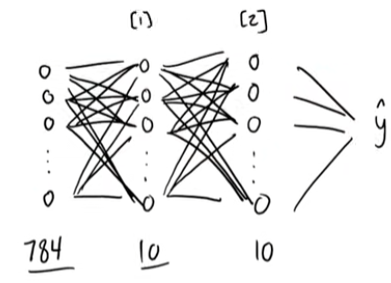

In [167]:
def init_params():
    # param cho lớp 1
    # tạo random các weight cho 784 nodes ở input connect đến 10 nodes ở layer 1
    W1 = np.random.rand(10, 784) - 0.5
    # bias cho 10 nodes của lớp 1
    b1 = np.random.rand(10, 1) - 0.5

    # param cho lớp 2
    # tạo random các weight cho 10 nodes ở layer 1 connect đến 10 nodes ở layer 3
    W2 = np.random.rand(10, 10) - 0.5
    # bias cho 10 nodes của lớp 2
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

chưa hiểu khúc này lắm nhma research đc thì như này

sets for array from input layer with 784 inputs, each with 10 connections to the first hidden layer and sets rand distribution from 0-1 and subracts 0.5 to get random initial paramaters from -0.5 to 0.5
    
Việc trừ đi 0.5 từ các giá trị được sinh ra bởi np.random.rand sẽ dịch chuyển phân phối sao cho nó được trung tâm quanh 0, với khoảng giá trị từ -0.5 đến 0.5. Việc này có thể mang lại lợi ích cho sự ổn định và hiệu quả của quá trình huấn luyện trong các mạng neural.

### activation function

In [168]:

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    

- ReLU (Rectified Linear Unit): Hàm kích hoạt cho hidden layer, chuyển các giá trị âm về 0.
- Softmax: Hàm kích hoạt cho output layer, chuyển các giá trị thành xác suất.

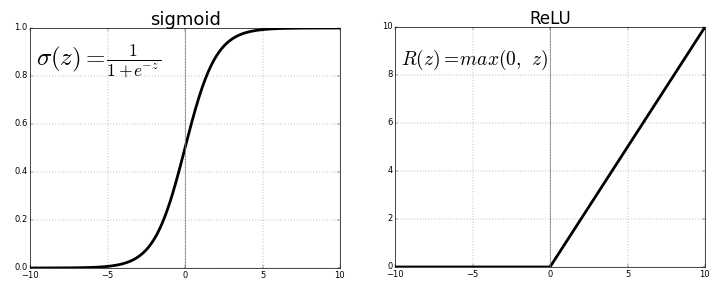

The softmax function is not used in hidden layers, as it is typically only used in the the output layer. 

Hàm softmax chuyển đổi các đặc trưng đã học ở lớp 1 thành xác suất. Ví dụ, nếu mạng neural dự đoán một ảnh là chữ số 7 với xác suất 90%, điều này có nghĩa là mạng neural rất chắc chắn rằng ảnh đó là chữ số 7.

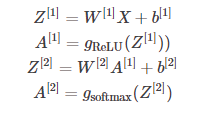

In [169]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [170]:
# đạo hàm của ReLu
def ReLU_deriv(Z):
    return Z > 0

# chuyển label thành one hot để tiến hành tiến error
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


ReLU có đạm hàm bằng O khi z < 0

## Back Propagation
the first phase of backpropagation is to compute the difference between our *prediction* (the final output activation in the activations list) and the true target value

ý nghĩa của việc đạo hàm là cực tiểu hóa hàm mất mát

In [171]:

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)

    # sai số của output
    # lấy output của layer 1 - giá trị thực tế 
    # giá trị thực tế phải được one hot
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    # sai số của lớp thứ 1
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


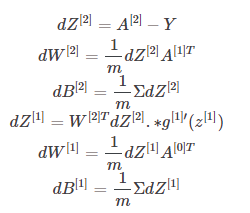

In [172]:

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

- alpha là learning rate

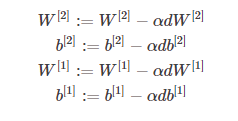

In [173]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_list = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            accuracy_list.append(accuracy)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, accuracy_list

## Training model

đây là Batch Gradient Descent, huấn luyện trên toan fbooj dữ liệu và cập nhật tham số sau mỗi lần lặp (interations)

In [174]:
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, Y_train, alpha = 0.10, iterations= 500)


Iteration:  0
[4 8 0 ... 2 8 0] [5 0 4 ... 5 6 8]
[4 8 0 ... 2 8 0] [5 0 4 ... 5 6 8]
0.07798333333333334
Iteration:  10
[5 8 2 ... 5 7 6] [5 0 4 ... 5 6 8]
[5 8 2 ... 5 7 6] [5 0 4 ... 5 6 8]
0.21251666666666666
Iteration:  20
[5 8 2 ... 5 7 6] [5 0 4 ... 5 6 8]
[5 8 2 ... 5 7 6] [5 0 4 ... 5 6 8]
0.3069
Iteration:  30
[5 8 6 ... 5 7 6] [5 0 4 ... 5 6 8]
[5 8 6 ... 5 7 6] [5 0 4 ... 5 6 8]
0.36501666666666666
Iteration:  40
[5 0 6 ... 5 3 6] [5 0 4 ... 5 6 8]
[5 0 6 ... 5 3 6] [5 0 4 ... 5 6 8]
0.4089833333333333
Iteration:  50
[5 0 6 ... 5 5 6] [5 0 4 ... 5 6 8]
[5 0 6 ... 5 5 6] [5 0 4 ... 5 6 8]
0.4491
Iteration:  60
[5 0 6 ... 5 5 6] [5 0 4 ... 5 6 8]
[5 0 6 ... 5 5 6] [5 0 4 ... 5 6 8]
0.48591666666666666
Iteration:  70
[3 0 6 ... 5 6 6] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 6] [5 0 4 ... 5 6 8]
0.5222
Iteration:  80
[3 0 4 ... 5 6 6] [5 0 4 ... 5 6 8]
[3 0 4 ... 5 6 6] [5 0 4 ... 5 6 8]
0.5544833333333333
Iteration:  90
[3 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
[3 0 4 ... 5 6 5] [5 0 4 ...

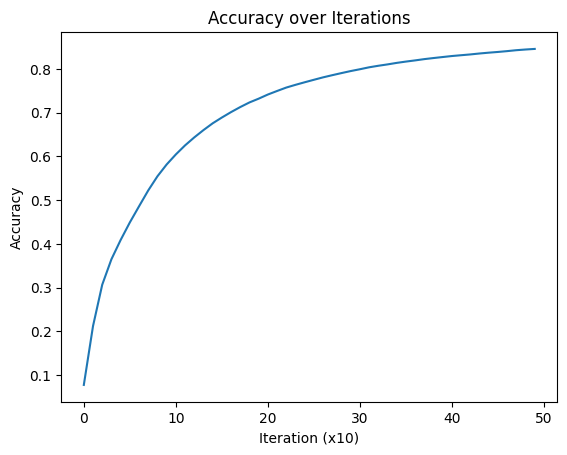

In [175]:
plt.plot(accuracy_list)
plt.xlabel('Iteration (x10)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()

## Prediction

In [176]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


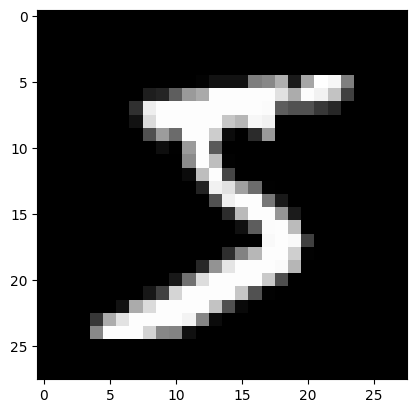

Prediction:  [0]
Label:  0


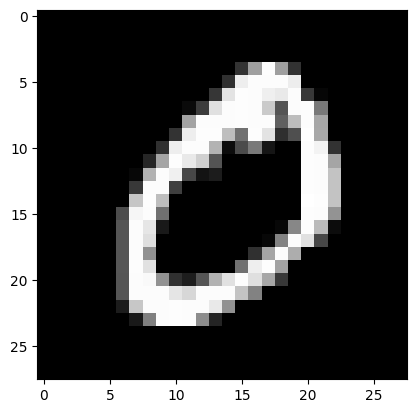

Prediction:  [4]
Label:  4


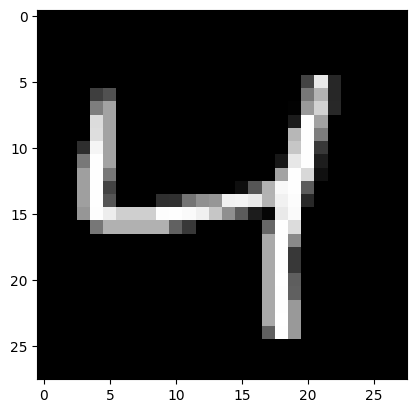

Prediction:  [1]
Label:  1


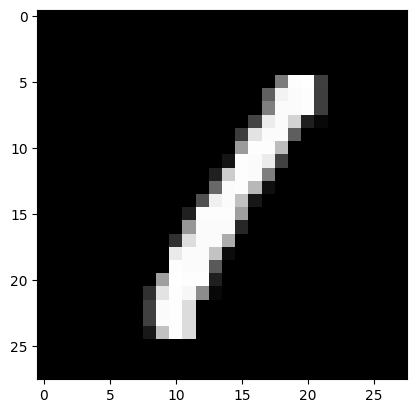

In [177]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [178]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 2 1 ... 4 8 6] [7 2 1 ... 4 5 6]


0.8483